In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import regularizers

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled)


### Blog : building autoencoders in keras
https://blog.keras.io/building-autoencoders-in-keras.html

In [20]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

## Convolutional Auto-Encoder

In [6]:
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
input_img = Input(shape=(1, 28, 28))

x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# at this point the representation is (32, 7, 7)

x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s - loss: 0.1653 - val_loss: 0.1067
Epoch 2/10
60000/60000 [==============================] - 18s - loss: 0.0977 - val_loss: 0.0926
Epoch 3/10
60000/60000 [==============================] - 18s - loss: 0.0906 - val_loss: 0.0864
Epoch 4/10
60000/60000 [==============================] - 18s - loss: 0.0872 - val_loss: 0.0845
Epoch 5/10
60000/60000 [==============================] - 18s - loss: 0.0850 - val_loss: 0.0851
Epoch 6/10
60000/60000 [==============================] - 18s - loss: 0.0835 - val_loss: 0.0813
Epoch 7/10
60000/60000 [==============================] - 18s - loss: 0.0825 - val_loss: 0.0811
Epoch 8/10
60000/60000 [==============================] - 18s - loss: 0.0817 - val_loss: 0.0798
Epoch 9/10
60000/60000 [==============================] - 18s - loss: 0.0808 - val_loss: 0.0795
Epoch 10/10
60000/60000 [==============================] - 18s - loss: 0.0804 - val_lo

In [9]:
decoded_noisy_imgs = autoencoder.predict(x_test_noisy)

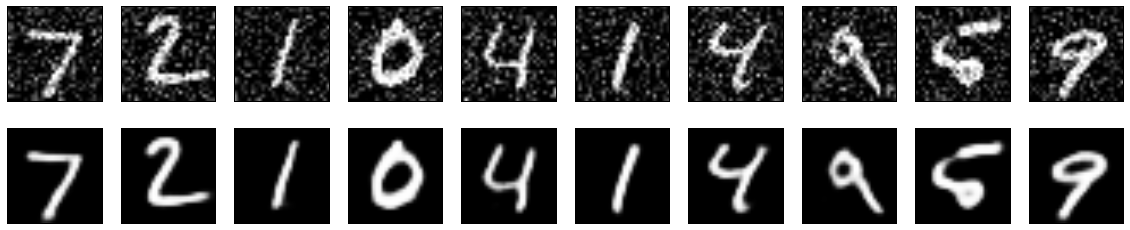

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_noisy_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()